In [1]:
!pip install tensorflow


In [2]:
!pip install keras

In [6]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential,load_model
import numpy as np
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv("C:/Users/Hp/Documents/csv/forestfires.csv")

In [7]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [8]:

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data["month"] = label_encoder.fit_transform(data["month"])
data["day"] = label_encoder.fit_transform(data["day"])
data["size_category"] = label_encoder.fit_transform(data["size_category"])

In [9]:
# split into input (X) and output (Y) variables
X = data.iloc[:,:11]
Y = data.iloc[:,-1]

X

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [10]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [11]:
# create model
model = Sequential()
model.add(layers.Dense(50, input_dim=11,  activation='relu'))
model.add(layers.Dense(11,  activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
#compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [13]:
# Fit the model
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
35/35 [==============================] - 3s 51ms/step - loss: 4.2267 - acc: 0.5646 - val_loss: 1.4746 - val_acc: 0.6374
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 1.2274 - acc: 0.6677 - val_loss: 1.1102 - val_acc: 0.7661
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6988 - acc: 0.7692 - val_loss: 0.5740 - val_acc: 0.7427
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3894 - acc: 0.8425 - val_loss: 0.4209 - val_acc: 0.8363
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 0.2511 - acc: 0.9041 - val_loss: 0.4171 - val_acc: 0.8421
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.2592 - acc: 0.8937 - val_loss: 0.7630 - val_acc: 0.8070
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.3031 - acc: 0.8935 - val_loss: 0.3308 - val_acc: 0.8596
Epoch 8/100
35/35 [==============================] - 0s 4ms/step - loss: 0.1748 - 

35/35 [==============================] - 0s 4ms/step - loss: 0.0278 - acc: 0.9876 - val_loss: 0.1076 - val_acc: 0.9357
Epoch 64/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0444 - acc: 0.9840 - val_loss: 1.2163 - val_acc: 0.8596
Epoch 65/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3268 - acc: 0.9464 - val_loss: 1.1195 - val_acc: 0.8655
Epoch 66/100
35/35 [==============================] - 0s 5ms/step - loss: 0.2449 - acc: 0.9641 - val_loss: 0.3973 - val_acc: 0.9006
Epoch 67/100
35/35 [==============================] - 0s 6ms/step - loss: 0.0892 - acc: 0.9757 - val_loss: 0.1272 - val_acc: 0.9474
Epoch 68/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0256 - acc: 0.9916 - val_loss: 0.1124 - val_acc: 0.9415
Epoch 69/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0449 - acc: 0.9745 - val_loss: 0.6180 - val_acc: 0.8772
Epoch 70/100
35/35 [==============================] - 0s 6ms/step - loss: 0.1083 - acc: 0

model

In [23]:
#compile model
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [26]:
#fit the model
model.fit(X,y,validation_split=0.33,epochs=150,batch_size=5)

Epoch 1/150
70/70 [==============================] - 0s 3ms/step - loss: 114.4378 - accuracy: 0.8179 - val_loss: 77.3902 - val_accuracy: 0.8830
Epoch 2/150
70/70 [==============================] - 0s 2ms/step - loss: 23.3623 - accuracy: 0.9566 - val_loss: 37.6972 - val_accuracy: 0.9181
Epoch 3/150
70/70 [==============================] - 0s 2ms/step - loss: 11.7648 - accuracy: 0.9682 - val_loss: 27.1030 - val_accuracy: 0.9298
Epoch 4/150
70/70 [==============================] - 0s 2ms/step - loss: 6.1232 - accuracy: 0.9798 - val_loss: 18.7740 - val_accuracy: 0.9474
Epoch 5/150
70/70 [==============================] - 0s 2ms/step - loss: 6.7504 - accuracy: 0.9827 - val_loss: 15.3264 - val_accuracy: 0.9532
Epoch 6/150
70/70 [==============================] - 0s 2ms/step - loss: 6.9040 - accuracy: 0.9769 - val_loss: 13.9824 - val_accuracy: 0.9474
Epoch 7/150
70/70 [==============================] - 0s 2ms/step - loss: 5.6302 - accuracy: 0.9798 - val_loss: 9.2686 - val_accuracy: 0.9591
Epo

In [27]:
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 1ms/step - loss: 0.2935 - accuracy: 0.9942
accuracy: 99.42%


In [15]:
# Visualize training history

# list all data in history
model.history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

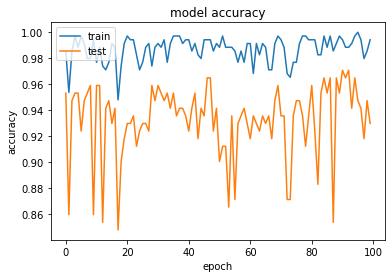

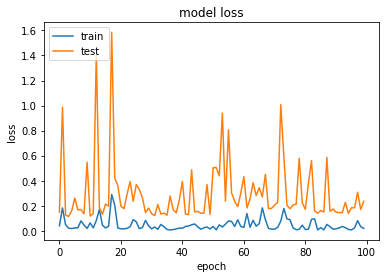

In [18]:
# summarize history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()